In [72]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [73]:
(x_train, y_train),(x_test, y_test)= datasets.cifar10.load_data()

In [74]:
x_train.shape

(50000, 32, 32, 3)

In [75]:
x_test.shape

(10000, 32, 32, 3)

In [76]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [77]:
y_train= y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [78]:
classes=["airplane","automobile","bird","cat","dog","frog","horse","ship","truck"]

In [79]:
def plt_sample(x,y,index):
  plt.figure(figsize=(20,3))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

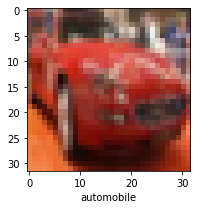

In [80]:
plt_sample(x_train, y_train, 5)

In [81]:
x_train= x_train/255
x_test= x_test/255

In [82]:
cnn= models.Sequential([
          #cnn
        layers.Conv2D(filters=32, kernel_size=(3,3), input_shape=(32,32,3), activation='relu' ),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),

        #dense
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')

])

In [83]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [84]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 65s 41ms/step - loss: 1.5134 - accuracy: 0.4525
Epoch 2/10
1563/1563 [==============================] - 65s 42ms/step - loss: 1.1553 - accuracy: 0.5925
Epoch 3/10
1563/1563 [==============================] - 65s 41ms/step - loss: 1.0154 - accuracy: 0.6457
Epoch 4/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.9321 - accuracy: 0.6775
Epoch 5/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.8754 - accuracy: 0.6954
Epoch 6/10
1563/1563 [==============================] - 65s 41ms/step - loss: 0.8300 - accuracy: 0.7126
Epoch 7/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.7852 - accuracy: 0.7252
Epoch 8/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7500 - accuracy: 0.7413
Epoch 9/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7142 - accuracy: 0.7510
Epoch 10/10
1563/1563 [==============================] - 64s 41m

In [85]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 4s 14ms/step - loss: 0.9018 - accuracy: 0.6981


[0.9017647504806519, 0.6980999708175659]

In [86]:
y_test= y_test.reshape(-1,)

In [88]:
y_pred= cnn.predict(x_test)
y_pred[:5]

array([[9.2219084e-04, 2.2547570e-04, 1.6137291e-02, 5.4281795e-01,
        1.1657312e-04, 3.5866359e-01, 3.0492637e-03, 2.4998406e-04,
        7.0984855e-02, 6.8328027e-03],
       [6.6877194e-02, 1.4217477e-01, 1.0512212e-05, 3.7562617e-07,
        1.6567121e-07, 6.0510530e-08, 2.1419266e-08, 6.8213707e-10,
        7.9077744e-01, 1.5946987e-04],
       [5.9278656e-02, 1.3617052e-01, 2.9396336e-03, 9.7865863e-03,
        1.1709804e-03, 2.2106667e-03, 4.6352210e-04, 2.0973789e-04,
        7.8442949e-01, 3.3402613e-03],
       [7.8278381e-01, 8.7222587e-03, 1.6708881e-02, 2.5776975e-04,
        1.8101367e-03, 1.2602478e-05, 2.0164071e-05, 3.9944895e-05,
        1.8958636e-01, 5.8007568e-05],
       [1.7993687e-05, 5.4284177e-05, 9.9557973e-03, 2.8520865e-02,
        9.2731558e-02, 1.1387761e-02, 8.5724300e-01, 4.5352925e-05,
        2.7634624e-05, 1.5710128e-05]], dtype=float32)

In [89]:
y_classes=[np.argmax(element)for element in y_pred]
y_classes[:3]

[3, 8, 8]

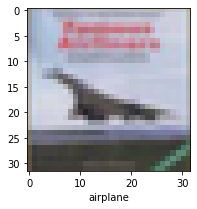

In [94]:
plt_sample(x_test, y_test, 3)

In [95]:
classes[y_classes[3]]


'airplane'